# Problem Statement

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.
- Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions
- Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing the Dataset

df = pd.read_csv('Admission.csv')
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
# Get the Info of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Admission Chance     400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
# Get the Summary Statistics of the Dataset

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Visualizing the Dataset

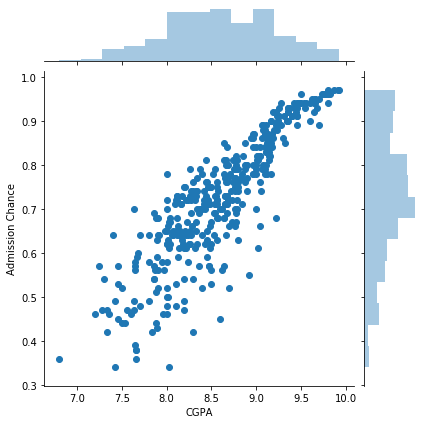

In [10]:
# Use Jointplot for CGPA and Admission Chance

sns.jointplot(x= "CGPA", y= "Admission Chance", data= df);

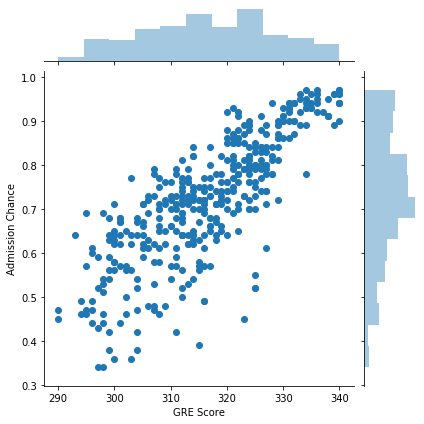

In [12]:
# Use Jointplot for GRE Score and Admission Chance

sns.jointplot(x= "GRE Score", y= "Admission Chance", data= df);

We can see there is a Linear Trend with the two. Lets check for all P&C using Pairplot

In [13]:
# Removing the First column from the Dataset

df = df.drop(['Serial No.'], axis= 1)
df.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [17]:
df['University Rating'].mean()

3.0875

In [18]:
df['University Rating'].median()

3.0

In [20]:
df['University Rating'].mode().values

array([3], dtype=int64)

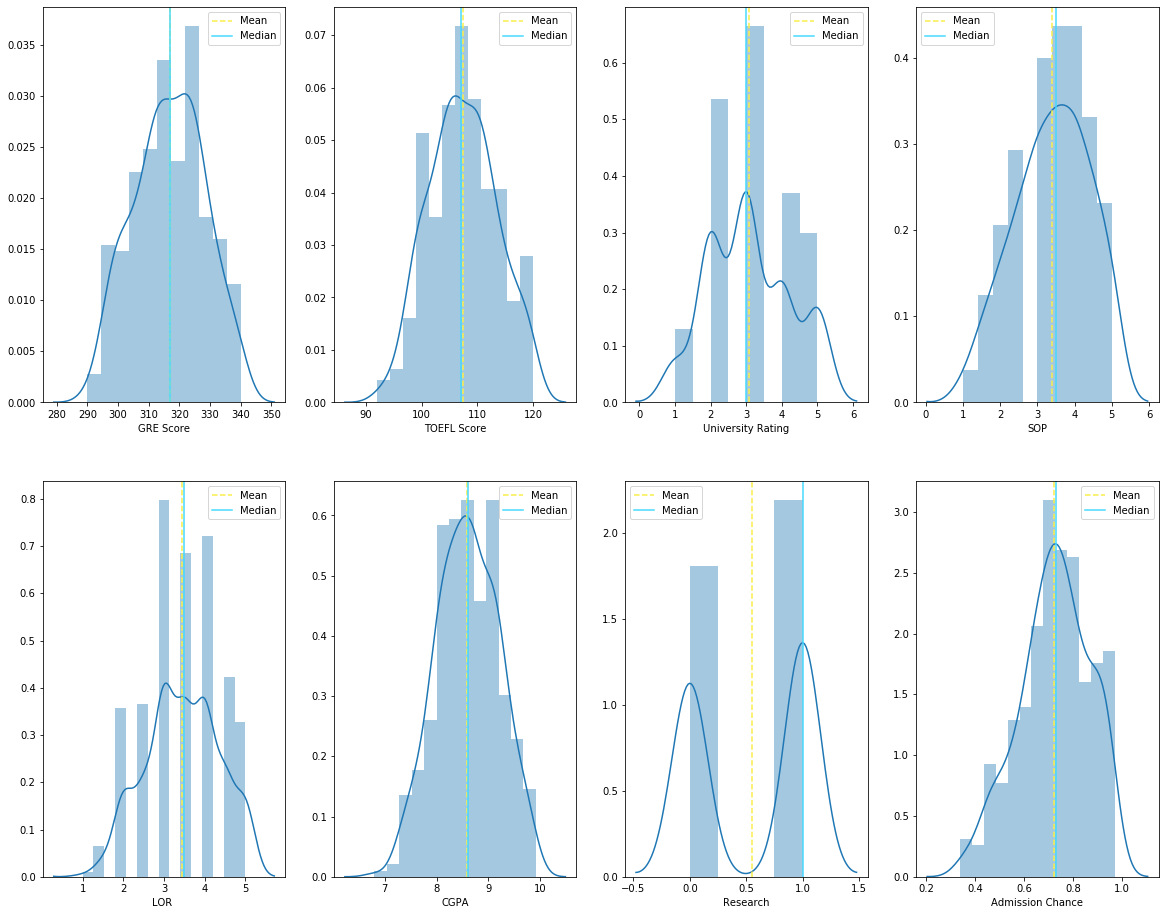

In [22]:
# Plotting a Distribution plot

n = 1

# Creating Figure Layout by adding SubPlots 
fig, ax = plt.subplots(2, 4, figsize= (20,16)) #  2 Row and 4 Column

# Create a loop to loop through all Columns and give distribution

for column in df.columns.values:
    
    # Plot on N value by initiating it - See the Difference between Subplot & Subplot's'
    plt.subplot(2,4,n)
    sns.distplot(df[column])
    
    # Add Mean and Median Lines to the Data
    plt.axvline(df[column].mean(), label= "Mean", ls= "--", c= "#f9ee4a")
    plt.axvline(df[column].median(), label= "Median", ls= "-", c= "#44d9ff")

    plt.legend();
    
    # Add 1 to n
    n+= 1

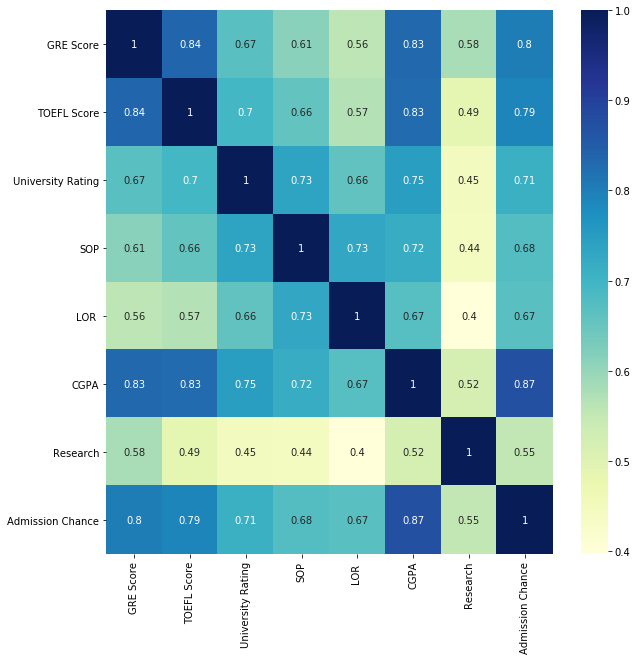

In [27]:
# Create a Heatmap to Understand the Correlations in the Data

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu') 

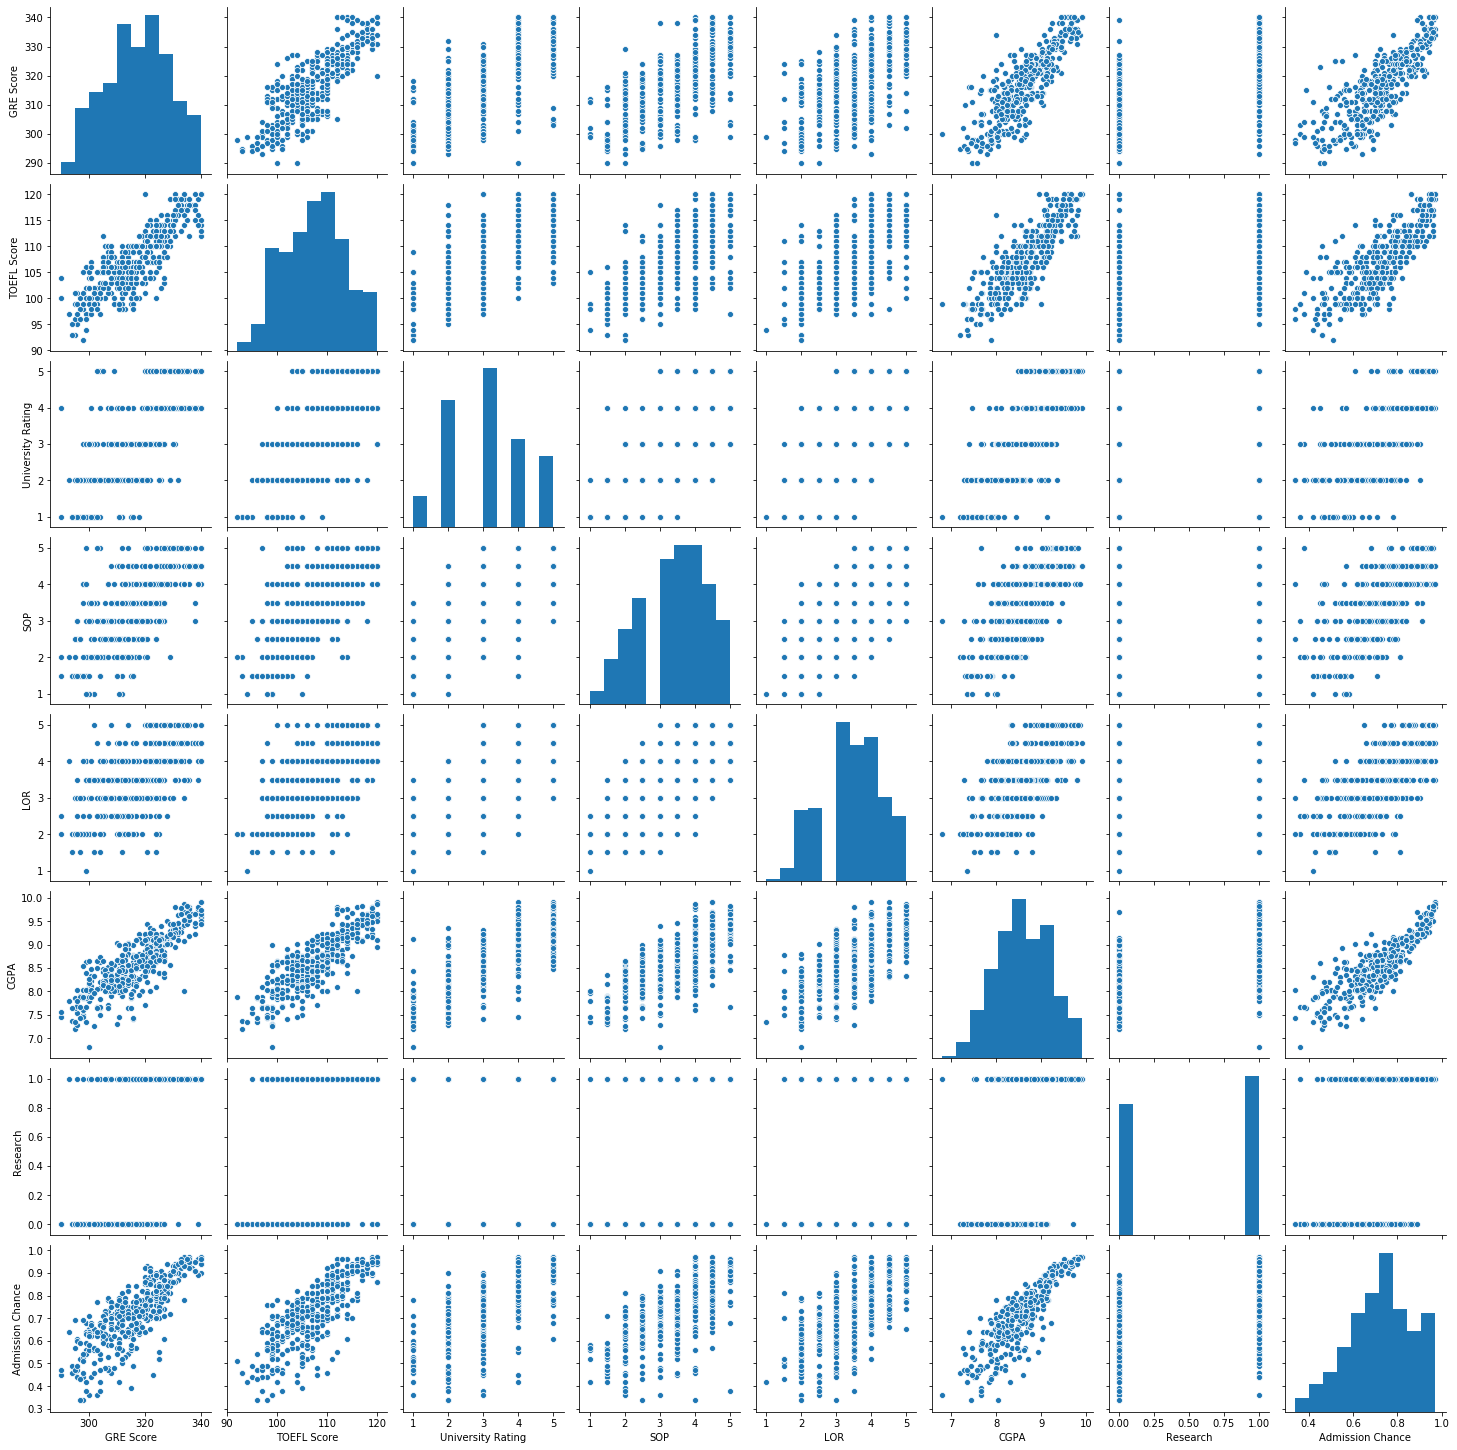

In [31]:
# Visualise the Data using Pairplot

sns.pairplot(df); # To Plot Outcome, Hue must be a Categorical Variable

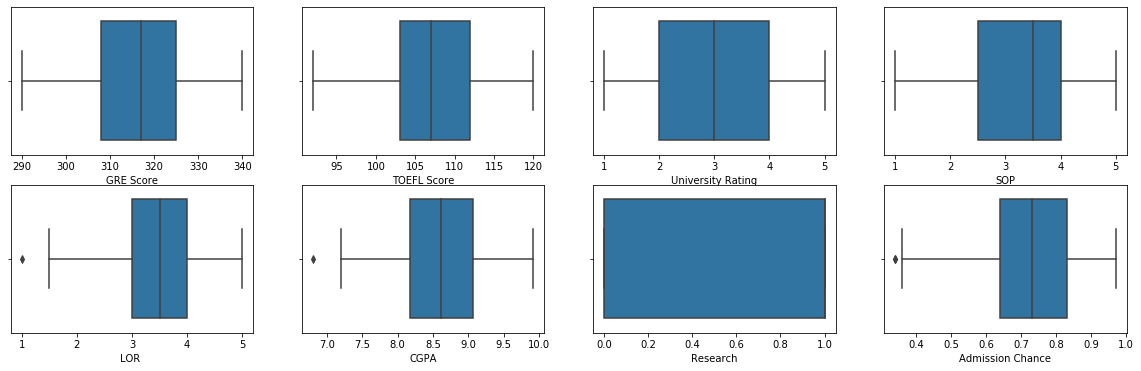

In [36]:
# Plotting a Box Plot

n = 1

# Creating Figure Layout by adding SubPlots 
fig, ax = plt.subplots(2, 4, figsize= (20,6)) #  2 Row and 4 Column

# Create a loop to loop through all Columns and give distribution

for column in df.columns.values:
    
    # Plot on N value by initiating it - See the Difference between Subplot & Subplot's'
    plt.subplot(2,4,n)
    sns.boxplot(df[column])
    
    # Add 1 to n
    n+= 1

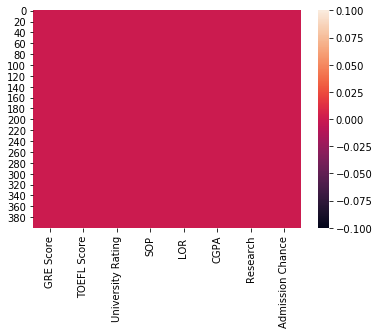

In [45]:
# Check for Null Values with the help of HeatMap

sns.heatmap(df.isnull())

# Shows No Null Values

### Model Training

In [37]:
X = df.drop(['Admission Chance'], axis= 1)
y = df['Admission Chance']

In [38]:
# Importing the ML Library and Splitting the Data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 320, random_state= 42) # Similar to train_size= 0.8 (80%)

In [42]:
# Get the Shape of X_train, X_test, y_train, y_test 

print(" The Shape of X_train is {}, X_test is {}, y_train is {}, y_test is {}.".format(X_train.shape,
                                                                                       X_test.shape,
                                                                                       y_train.shape,
                                                                                       y_test.shape))

 The Shape of X_train is (320, 7), X_test is (80, 7), y_train is (320,), y_test is (80,).


In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Multiple Linear Model Coefficients (m)', regressor.coef_)
print('Multiple Linear Model Coefficients (b)', regressor.intercept_)

Multiple Linear Model Coefficients (m) [ 0.00186251  0.00272369  0.00737745 -0.00029274  0.01577024  0.11466916
  0.02222705]
Multiple Linear Model Coefficients (b) -1.2302337510969892


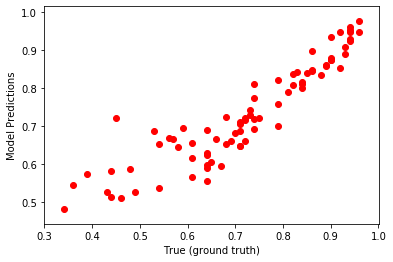

In [49]:
# Predicting the Model

y_predict = regressor.predict(X_test)

# Plot a Scatter Plot
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)');

### Evaluation Metrics

In [50]:
# Importing the Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt # We Import SQRT for RMSE

In [51]:
# Root Mean Squared Error
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))

# Mean Squared Error
MSE = mean_squared_error(y_test, y_predict)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_predict)

# R Square
r2 = r2_score(y_test, y_predict)

# Adjusted R Square

k = X_test.shape[1] # No of Columns
n = len(X_test) # No of Data of Test

adj_r2 = 1 - (1 - r2) * ( n - 1 )  /  ( n - k - 1)

# Mean Absolute Percentage Error
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  ) * 100

In [52]:
print("The Evaluation Metrics are shown below:\n")
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

The Evaluation Metrics are shown below:

RMSE =  0.068 
MSE = 0.004617003377285011 
MAE = 0.04795673362091198 
R2 = 0.8212082591486991 
Adjusted R2 = 0.803825728788156 
MAPE = 8.5118487324017


In [80]:
# To Get a better Estimate, we take Indep Variables and Train the Model - GRE and TOEFL

X = df[['GRE Score', 'TOEFL Score']]
y = df['Admission Chance']

In [81]:
X.head()

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103


In [82]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Admission Chance, dtype: float64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 80, random_state= 42) # Similar to test_size= 0.2 (20%)

In [84]:
# Get the Shape of X_train, X_test, y_train, y_test 

print(" The Shape of X_train is {}, X_test is {}, y_train is {}, y_test is {}.".format(X_train.shape,
                                                                                       X_test.shape,
                                                                                       y_train.shape,
                                                                                       y_test.shape))

 The Shape of X_train is (320, 2), X_test is (80, 2), y_train is (320,), y_test is (80,).


Multiple Linear Model Coefficients (m) [0.00596842 0.00866623]
Multiple Linear Model Coefficients (b) -2.0969273279118052


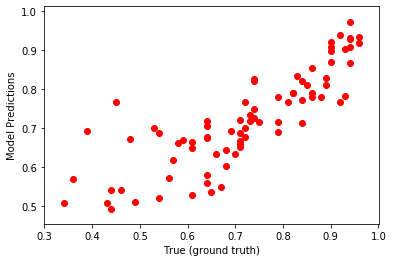

In [85]:
# Fit the Model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Multiple Linear Model Coefficients (m)', regressor.coef_)
print('Multiple Linear Model Coefficients (b)', regressor.intercept_)

# Predicting the Model

y_predict = regressor.predict(X_test)

# Plot a Scatter Plot
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)');

In [86]:
# Root Mean Squared Error
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))

# Mean Squared Error
MSE = mean_squared_error(y_test, y_predict)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_predict)

# R Square
r2 = r2_score(y_test, y_predict)

# Adjusted R Square

k = X_test.shape[1] # No of Columns
n = len(X_test) # No of Data of Test

adj_r2 = 1 - (1 - r2) * ( n - 1 )  /  ( n - k - 1)

# Mean Absolute Percentage Error
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  ) * 100

# Print the Metrics

print("The Evaluation Metrics are shown below:\n")
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

The Evaluation Metrics are shown below:

RMSE =  0.089 
MSE = 0.007871975759628138 
MAE = 0.0647815767993733 
R2 = 0.6951606626654036 
Adjusted R2 = 0.6872427577995699 
MAPE = 10.968639537389064


#### Plotting the Projection

In [87]:
from mpl_toolkits.mplot3d import Axes3D

In [88]:
# Creating a Mesh Grid

X_surf, y_surf = np.meshgrid( np.linspace( start= df['GRE Score'].min(), stop= df['GRE Score'].max(), num=100), \
                              np.linspace( start= df['TOEFL Score'].min(), stop=  df['TOEFL Score'].max() , num=100))

# meshgrid( x , y ) returns 2-D grid coordinates based on the coordinates contained in vectors x and y
print("The Shape of meshed X Surface is {} and y surface is {}".format(X_surf.shape, y_surf.shape))

# Flatten 100*100 with ravel and create a Dataset
onlyX = pd.DataFrame( {'GRE Score': X_surf.ravel(), 'TOEFL Score':y_surf.ravel()} ) 

# Perform Predictions - Predict Y w.r.t Meshed x

fittedY = regressor.predict(onlyX)

# Convert the Shape of fittedY from 10000 to 100 * 100 using reshape to bring it effectively into plot

# fittedY = fittedY.reshape(x_surf.shape)
fittedY = fittedY.reshape((100,100))
fittedY.shape

The Shape of meshed X Surface is (100, 100) and y surface is (100, 100)


(100, 100)

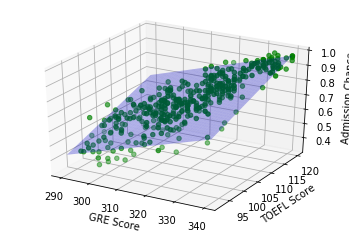

In [91]:
# Plot the Figure with Projections

fig = plt.figure()
# 111 means 1 image only
ax = fig.add_subplot(111, projection = '3d') # 111 for 1 Plot ; 3D - means Plane

# Plots the Datapoints only
ax.scatter( df['GRE Score'], df['TOEFL Score'] , df['Admission Chance'] , c = 'green', marker ='o'  )

# Creates the Surface with Meshed data (For 3D Projections)
ax.plot_surface(X_surf, y_surf, fittedY, color = 'blue', alpha = 0.3)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Acceptance Chance');

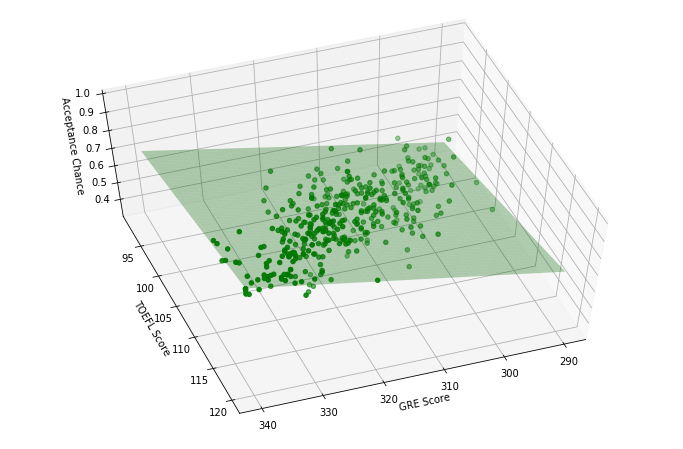

In [92]:
# Alter the Projection of the Visual

# Plot the Figure with Projections

fig = plt.figure(figsize= (12, 8))
# 111 means 1 image only
ax = fig.add_subplot(111, projection = '3d')

# Plots the Datapoints only
ax.scatter( df['GRE Score'], df['TOEFL Score'] , df['Admission Chance'] , c = 'green', marker ='o'  )

# Creates the Surface with Meshed data (For 3D Projections)
ax.plot_surface(X_surf, y_surf, fittedY, color = 'green', alpha = 0.3)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Acceptance Chance');

# Setting elevation and azimut to Rotate the Data
ax.view_init(60, 70)
plt.show()